Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 8, 8, 64)         

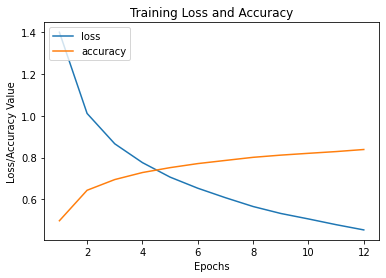

In [1]:
# Import libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

# Declare constant variables
epochs = 10
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Load data from the cifar 10 dataset
(xTrain, yTrain), (xTest, yTest) = cifar10.load_data()

# Normalize the data (set numpy array values between 0 and 1)
xTrain = xTrain/255
xTest = xTest/255

# Building the neural network
model = models.Sequential()# Import libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

# Declare constant variables
epochs = 12
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Load data from the cifar 10 dataset
(xTrain, yTrain), (xTest, yTest) = cifar10.load_data()

# Normalize the data (set numpy array values between 0 and 1)
xTrain = xTrain/255
xTest = xTest/255

# Building the neural network
model = models.Sequential()

model.add(layers.Conv2D(filters = 32, kernel_size = (3, 3), padding = "same", activation = 'relu', input_shape = (32, 32, 3)))
model.add(layers.Conv2D(filters = 32, kernel_size = (3, 3), padding = "same", activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(filters = 64, kernel_size = (3, 3), padding = "same", activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Dropout(0.5))

model.add(layers.Flatten())

model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Print summary of the model
model.summary()

# Train the neural network
trainHistory = model.fit(xTrain, yTrain, epochs=epochs)

# Receive and print the performance data on the test values
lossValue, accuracyValue = model.evaluate(xTest, yTest)
print(f"The CNN's loss is: {lossValue}")
print(f"The CNN's accuracy is: {accuracyValue * 100} %")

# Generate the training and validation losses plots
trainingLoss = trainHistory.history['loss']
trainingAccuracy = trainHistory.history['accuracy']
trainingIterations = range(1, len(trainingLoss) + 1)

# Produce the training loss plot
plt.plot(trainingIterations, trainingLoss)
plt.plot(trainingIterations, trainingAccuracy)
plt.title('Training Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy Value')
plt.legend(['loss', 'accuracy'], loc = 'upper left')
plt.show()
